# Практическая задача

## Используя реальный датасет обучить модель
1. Скачать реальный датасет California housing
2. Рассмотреть его признаки
3. Обучить модель на нескольких признаках
4. Сохранить экспортировать график зависимости предсказанного от реального

### Обучение на одном признаке

In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#Загрузили данные
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
y = housing.target
X.head()

,AveRooms
0,6.984127
1,6.238137
2,8.288136
3,5.817352
4,6.281853


In [55]:
#Разделяем данные на тестовую и тренировочную выборки
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#Стандартизируем признаки, чтобы все данные имели одинаковый масштаб
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [58]:
print("Coef:", model.coef_[0], "Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

Coef: 0.14987753382504015 Intercept: 2.0550030959302323
MSE: 1.3064814524865533 R2: 0.022664013398541183


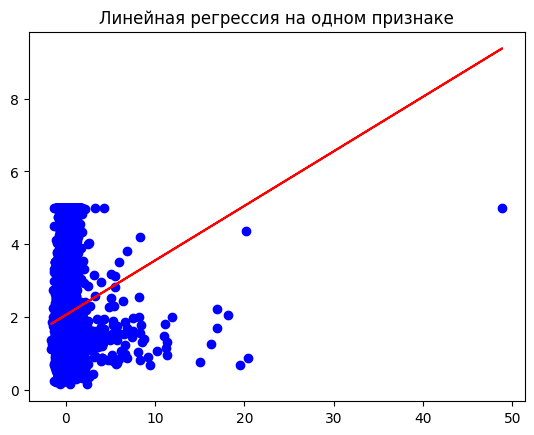

In [59]:
plt.scatter(X_test_scaled, y_test, color='blue')
plt.plot(X_test_scaled, y_pred, color='red')
plt.title('Линейная регрессия на одном признаке')
plt.show()

### Обучение на всех признаках

In [73]:
#Теперь берем все признаки
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [79]:
print("Coef:\n", model.coef_, "\nIntercept:\n", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

Coef:
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178] 
Intercept:
 2.0719469373788777
MSE: 0.555891598695244 R2: 0.5757877060324511


### Выбор необходимых признаков

Следует рассмотреть мультиколлинеарность признаков и избавиться от лишних, которые могут быть избыточны\
Если зависимость между признаками высокая, то они представляют одну и ту же информацию.

In [80]:
corr_matrix = X.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [83]:
high_corr_features = [(col1 , col2, corr_matrix.loc[col1,col2]) 
                      for col1 in corr_matrix.columns 
                      for col2 in corr_matrix.columns
                      if col1!=col2 and abs(corr_matrix.loc[col1,col2])>0.8]
collineary_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
collineary_df

,Feature 1,Feature 2,Correlation
0,AveRooms,AveBedrms,0.847621
1,AveBedrms,AveRooms,0.847621
2,Latitude,Longitude,-0.924664
3,Longitude,Latitude,-0.924664


Рассмотрим так же и фактор увеличения дисперсии. \
Простой пример:\
Если хочется посмотреть на сколько высоко пригнут шарики, но если шарики связаны, то влияние одного будет сказываться на результаты другого

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


Отсюда можно сделать вывод, что избыточными признаками могут быть AveBedrms и Longitude. Убирать следует по одному\
Возможно, что MedInc тоже, но судя по низкой корреляции с другими признаками, его вероятно можно оставить

In [100]:
X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns=["AveBedrms"])
X

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Coef:\n", model.coef_, "\nIntercept:\n", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

Coef:
 [ 0.70825998  0.12340562  0.0456367  -0.00330528 -0.03748313 -0.97829037
 -0.93174157] 
Intercept:
 2.0719469373788777
MSE: 0.5473264990498138 R2: 0.5823239094526443


При удалении признака AveBedrms получаем наилучшее значение для модели